In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Environment:
    def __init__(self) -> None:
        self.state = 0
        self.terminated = False

    def reset(self):
        self.state = 0
        self.terminated=True

    def new_ep(self):
        self.terminated=False
        
    def get_state(self):
        return self.state

    def get_reward(self, action):
        # action=0->L, a=1->R, a=2->C
        if self.state == 0:
            rewards = [1, 2, -1]
            reward = rewards[action]
        elif self.state == 1:
            rewards = [8,-8]
            reward = rewards[action]
        elif self.state == 2:
            rewards = [0,4]
            reward = rewards[action]

        return reward
    
    def take_step(self,  action):
        self.terminated = False
        reward = self.get_reward(action)
        if self.state == 0:
            if action < 2:
                # there is no further state
                self.reset()
            else:
                #random transition to left or right if C is chosen
                self.state = np.random.randint(1,3)
        else:
            # there is no further state
            self.reset()
        return reward


In [4]:
class Agent:
    def __init__(self, env, epsilon_a=0.075, policy_type="random", epsilon_c=0.2, decay=0, beta=1) -> None:
        self.vs = np.zeros(3)
        self.ms = [[0,0,0],[0,0],[0,0]]
        self.policy_type = policy_type
        self.policy = [[1/3,1/3,1/3],[0.5,0.5],[0.5,0.5]]
        self.env = env
        self.epsilon_a = epsilon_a
        self.epsilon_c = epsilon_c
        self.decay = decay
        self.beta = beta

    def reset(self):
        #reset at start of new epoch
        self.vs = np.zeros(3)
        self.ms = [[0,0,0],[0,0],[0,0]]
        self.policy = [[1/3,1/3,1/3],[0.5,0.5],[0.5,0.5]]

    def critic(self):
        return self.vs

    def actor(self):
        state = self.env.get_state()                
        if state == 0:
            action = np.random.choice(np.arange(3), p=self.policy[state])
        else:
            action = np.random.choice(np.arange(2), p=self.policy[state])
        return action
    
    def update_policy(self, state,new_state,action):
        if action < 2:
            delta = reward - self.vs[state]
        else:
            delta = reward + self.vs[new_state] - self.vs[state]
        for a in range(len(self.ms[state])):  
            self.ms[state][a] = (1-self.decay)*self.ms[state][a] + self.epsilon_a*self.delta_func(self,action,a)*delta
            self.policy[state] = self.softmax(self, self.ms[state])

    def update_weights(self, reward, state, new_state):
        if new_state != 0:
            delta = reward + self.vs[new_state] - self.vs[state]
        else:
            delta = reward - self.vs[state]

        self.vs[state] += self.epsilon_c * delta

        return self.vs

    def softmax(self,x):
        for x_i in x:
            x_i = self.beta * x_i
        return(np.exp(x)/np.exp(x).sum())

    def delta_func(self,a,b):
        return a == b



In [9]:
# policy evaluation
episodes = 700
epochs = 700
epsilon = 0.1

env = Environment()
agent = Agent(env=env, epsilon_a = epsilon, policy_type="actor_critic")
v_over_epochs_pe = np.zeros((epochs,episodes, 3))
for epoch in range(epochs):
    agent.reset()

    for episode in range(episodes):
        for step in range(2):
            if env.terminated == False:
                state = env.get_state()
                vs = agent.critic()
                action = agent.actor()
                reward = env.take_step(action)
                new_state = env.get_state()
                agent.update_weights(reward, state, new_state)

        v_over_epochs_pe[epoch,episode] = vs
        env.new_ep()



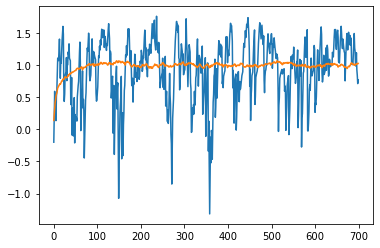

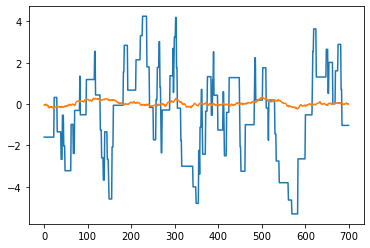

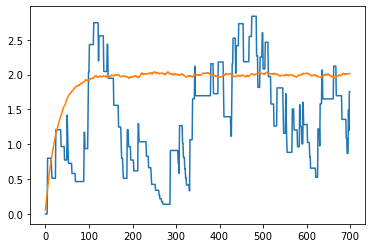

In [14]:
# plot policy evaluation
means_per_epoch_1_pe = np.mean(v_over_epochs_pe[:,:,0], axis=0)
plt.plot(range(epochs), v_over_epochs_pe[0,:,0])
plt.plot(range(epochs), means_per_epoch_1_pe)
plt.show()
means_per_epoch_2_pe = np.mean(v_over_epochs_pe[:,:,1], axis=0)
plt.plot(range(epochs), v_over_epochs_pe[0,:,1])
plt.plot(range(epochs), means_per_epoch_2_pe)

plt.show()

means_per_epoch_3_pe = np.mean(v_over_epochs_pe[:,:,2], axis=0)
plt.plot(range(epochs), v_over_epochs_pe[0,:,2])
plt.plot(range(epochs), means_per_epoch_3_pe)

plt.show()



In [11]:
#actor critic learning
episodes = 700
epochs = 700
env = Environment()
agent = Agent(env=env, policy_type="actor_critic")
v_over_epochs = np.zeros((epochs,episodes, 3))
for epoch in range(epochs):
    agent.reset()

    for episode in range(episodes):
        for step in range(2):
            if env.terminated == False:
                state = env.get_state()
                vs = agent.critic()
                action = agent.actor()
                reward = env.take_step(action)
                new_state = env.get_state()
                agent.update_policy(state, new_state,action)
                agent.update_weights(reward, state, new_state)

        v_over_epochs[epoch,episode] = vs
        env.new_ep()



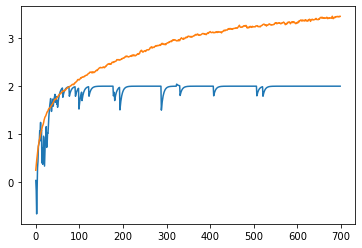

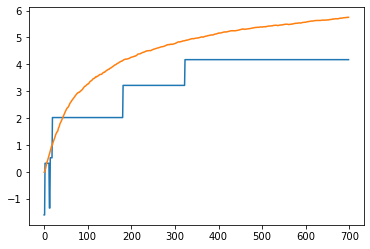

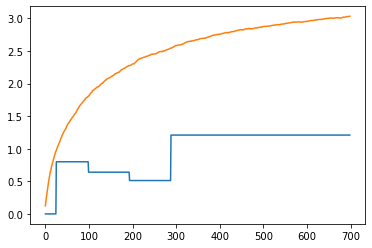

In [13]:
# plot actor critic results

means_per_epoch_1 = np.mean(v_over_epochs_short[:,:,0], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,0])
plt.plot(range(epochs_short), means_per_epoch_1)
plt.show()
means_per_epoch_2 = np.mean(v_over_epochs_short[:,:,1], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,1])
plt.plot(range(epochs_short), means_per_epoch_2)

plt.show()

means_per_epoch_3 = np.mean(v_over_epochs_short[:,:,2], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,2])
plt.plot(range(epochs_short), means_per_epoch_3)

plt.show()



In [15]:
#test different parameters
episodes = 700
epochs = 700
env = Environment()
agent = Agent(env=env, policy_type="actor_critic", decay=0.5)
v_over_epochs = np.zeros((epochs,episodes, 3))
for epoch in range(epochs):
    agent.reset()

    for episode in range(episodes):
        for step in range(2):
            if env.terminated == False:
                state = env.get_state()
                vs = agent.critic()
                action = agent.actor()
                reward = env.take_step(action)
                new_state = env.get_state()
                agent.update_policy(state, new_state,action)
                agent.update_weights(reward, state, new_state)

        v_over_epochs[epoch,episode] = vs
        env.new_ep()



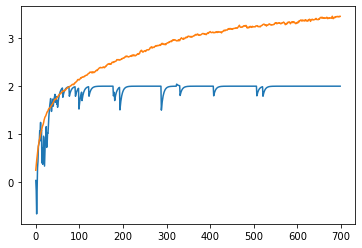

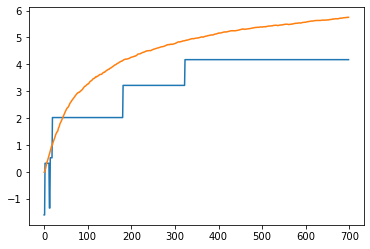

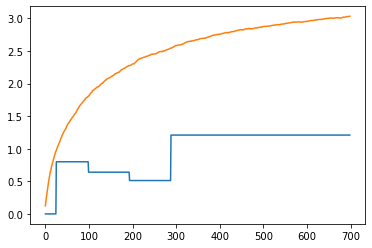

In [16]:
means_per_epoch_1 = np.mean(v_over_epochs_short[:,:,0], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,0])
plt.plot(range(epochs_short), means_per_epoch_1)
plt.show()
means_per_epoch_2 = np.mean(v_over_epochs_short[:,:,1], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,1])
plt.plot(range(epochs_short), means_per_epoch_2)

plt.show()

means_per_epoch_3 = np.mean(v_over_epochs_short[:,:,2], axis=0)
plt.plot(range(epochs_short), v_over_epochs_short[0,:,2])
plt.plot(range(epochs_short), means_per_epoch_3)

plt.show()
